In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd 

In [3]:
dg=pd.read_csv(r'/content/gdrive/MyDrive/ml datasets/IRIS.csv') #imported dataset
print(dg)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


1.Exploration

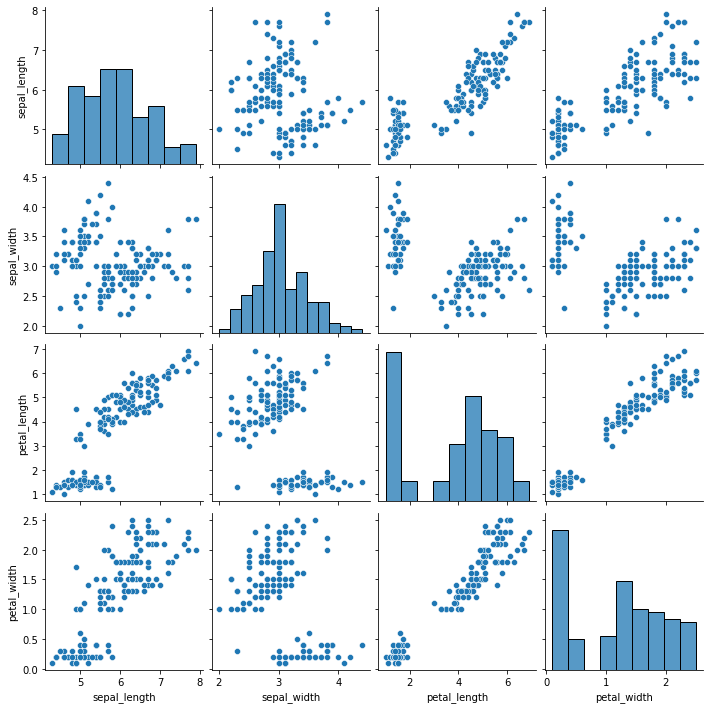

In [4]:
import seaborn as sns
sns.pairplot(dg)

In [5]:
dg.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dg.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

In [7]:
dg.kurtosis()

sepal_length   -0.552064
sepal_width     0.290781
petal_length   -1.401921
petal_width    -1.339754
dtype: float64

In [8]:
cr=dg.corr() 
print(cr)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


Text(0.5, 1.0, 'Correlation')

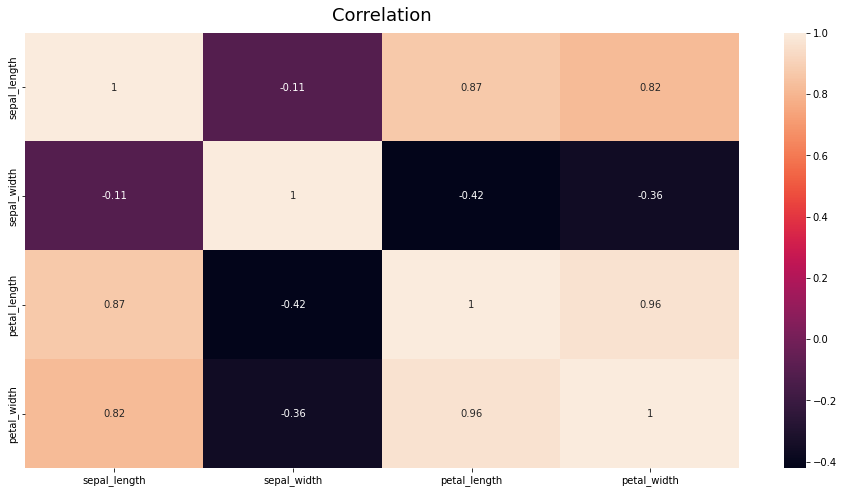

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
hm=sns.heatmap(cr,annot=True)
hm.set_title('Correlation',fontdict={'fontsize':18},pad=12)

2.Data Cleaning 

In [10]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
dg[dg.duplicated(keep=False)] # to check for duplicate value

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [12]:
#DataFrame.drop_duplicates(subset=None, keep=’first’, inplace=False) where first=first unique,last=last unique,false=all duplicate
#subset can be one column or group of coulmn to search from 
dg.drop_duplicates(keep='first',inplace=True)
dg[dg.duplicated(keep=False)] # to check for duplicate value after modification

,sepal_length,sepal_width,petal_length,petal_width,species


3.Splitting dataset

In [94]:
#lets split dataset
X=dg.iloc[:,[0,1,2,3]].values
y=dg.loc[:,'species']

4.To find optimal number of k using elbow method 

In [95]:
dg.shape

(147, 5)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fad89bb2e90>,
                 k=None, metric=None, model=None, timings=True)

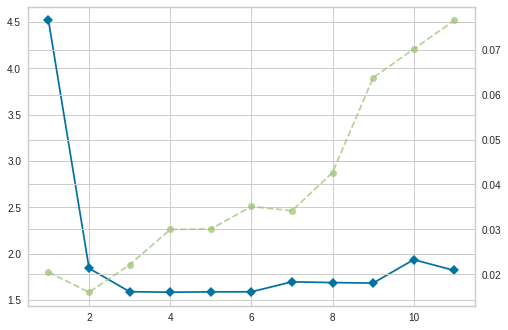

In [96]:
#elbow method for each k wcss is compared and plotted. WCSS is the sum of squared distance between each point and the centroid in a cluster
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12), locate_elbow=True)

visualizer.fit(X)        # Fit the data to the visualizer

In [97]:
sse = []
sc = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)
  score = silhouette_score(scaled_features,y)
  sc.append(score)

In [98]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [99]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 147, dtype: object

5.evaluating the optimal k value , elbow shape obsereved in k=3

In [40]:
pip install kneed

In [46]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [101]:
# silhouette score for k=3
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_features, pred, metric='euclidean')
print(score)

0.44096597650768427


6.Build the final model with k=3


In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [103]:
kmodel= KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=30)
kmodel.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=30,
       tol=0.0001, verbose=0)

In [104]:
# The lowest SSE value : sum of squared error(SSE)
kmodel.inertia_

138.2577113311786

In [105]:
# Final locations of the centroid
kmodel.cluster_centers_

array([[-0.06600649, -0.87873258,  0.32827074,  0.25818176],
       [ 1.11874194,  0.09175788,  0.98702247,  1.0108632 ],
       [-1.02392779,  0.86211404, -1.32208614, -1.26950045]])

In [69]:
# The number of iterations required to converge
kmodel.n_iter_

6

7.Visulaize the clusters

In [106]:
pred = kmodel.fit_predict(X)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

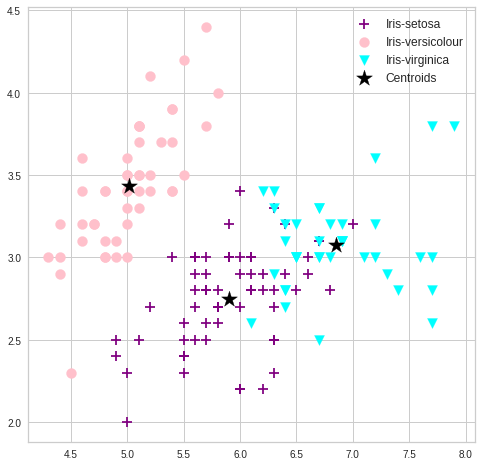

In [150]:
#Visualising the clusters
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'purple',marker='+', label = 'Iris-setosa')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'pink', label = 'Iris-versicolour')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s = 100, c = 'aqua', marker='v', label = 'Iris-virginica')
plt.scatter(kmodel.cluster_centers_[:,0],kmodel.cluster_centers_[:,1],marker='*',s=25**1.75,c='black', label = 'Centroids')
plt.legend(fontsize='medium')

plt.rcParams["figure.figsize"] = (8,8)

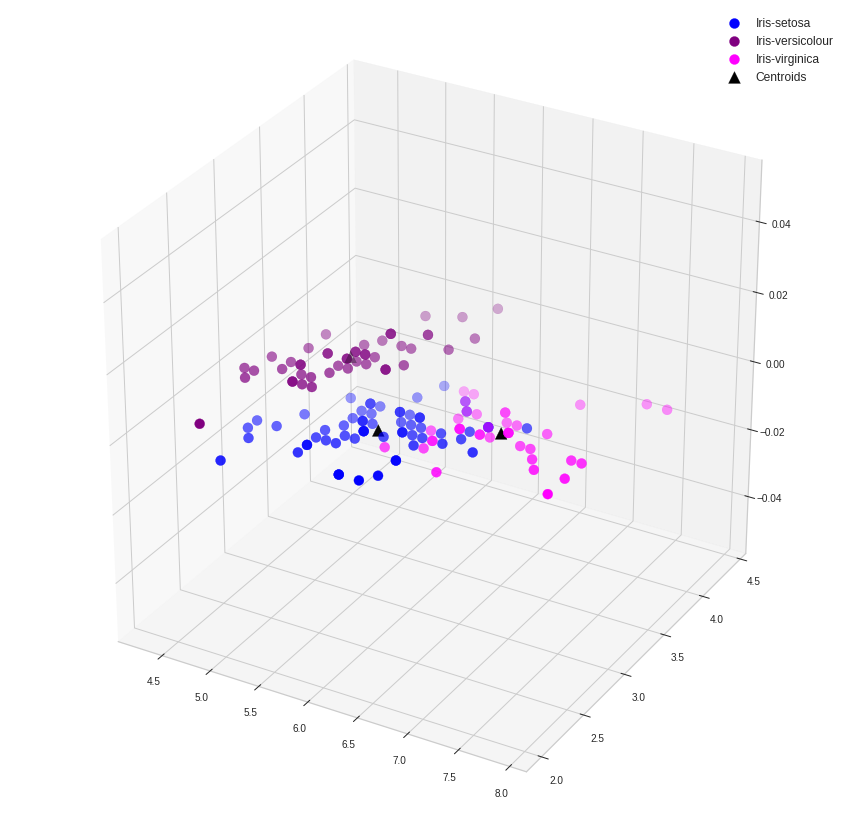

In [146]:
# 3D scatterplot
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s = 100, c = 'magenta', label = 'Iris-virginica')
plt.scatter(kmodel.cluster_centers_[:, 0], kmodel.cluster_centers_[:,1], s = 140, c = 'black',marker='^', label = 'Centroids')
plt.legend(fontsize='medium')
plt.show()
